<h1 style="color:green;"> Data modelling </h1>


<h3> Import necessary libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

<h3> Chúng ta sẽ nhìn lại tập dữ liệu sau quá trình tiền xử lý và khai thác </h3>

In [2]:
cleaned_df = pd.read_csv('processed_data.csv')

In [3]:
cleaned_df.head(10)

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,Rating
0,Endless Monday: Dreams and Deadlines,0,0,2022,1581,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0.931514
1,Papa's Freezeria Deluxe,0,0,592,470,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,0.957730
2,Cats Hidden in Jingle Jam,0,0,1819,1412,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.959760
3,An Arcade Full of Cats,1,0,439,359,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.947230
4,Ib,0,0,2036,1003,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0.946714
5,Lil Gator Game,0,0,1074,1048,3363,3395,32,260000.0,2022,...,0,0,0,0,0,0,0,0,0,0.948134
6,星空列车与白的旅行,1,1,2076,1588,3056,3083,27,188000.0,2021,...,0,0,0,0,0,0,0,0,0,0.947493
7,Patrick's Parabox,1,0,1289,1015,2800,2820,20,260000.0,2022,...,0,0,0,0,0,1,0,0,0,0.947817
8,A Castle Full of Cats,1,0,439,359,2512,2526,14,36000.0,2022,...,0,0,0,0,0,0,0,0,0,0.947701
9,Dialtown: Phone Dating Sim,1,1,464,375,1316,1324,8,115000.0,2022,...,0,0,0,0,0,0,0,0,0,0.937228


### Để có thể nhìn nhận rõ mối quan hệ giữa các cột lý tưởng để làm feature cho model và cột target **Rating**, ta sẽ dùng **Mutual Information** 

#### Ta nhận thấy cột '**Title**' chỉ đơn giản là các giá trị thể hiện tên của các trò chơi điện tử trong tập dữ liệu, ta có thể suy đoán nó không mang lại ý nghĩa hay mối quan hệ gì với cột target '**Rating**'

In [4]:
cleaned_df.drop(columns = ['Title'], inplace = True)

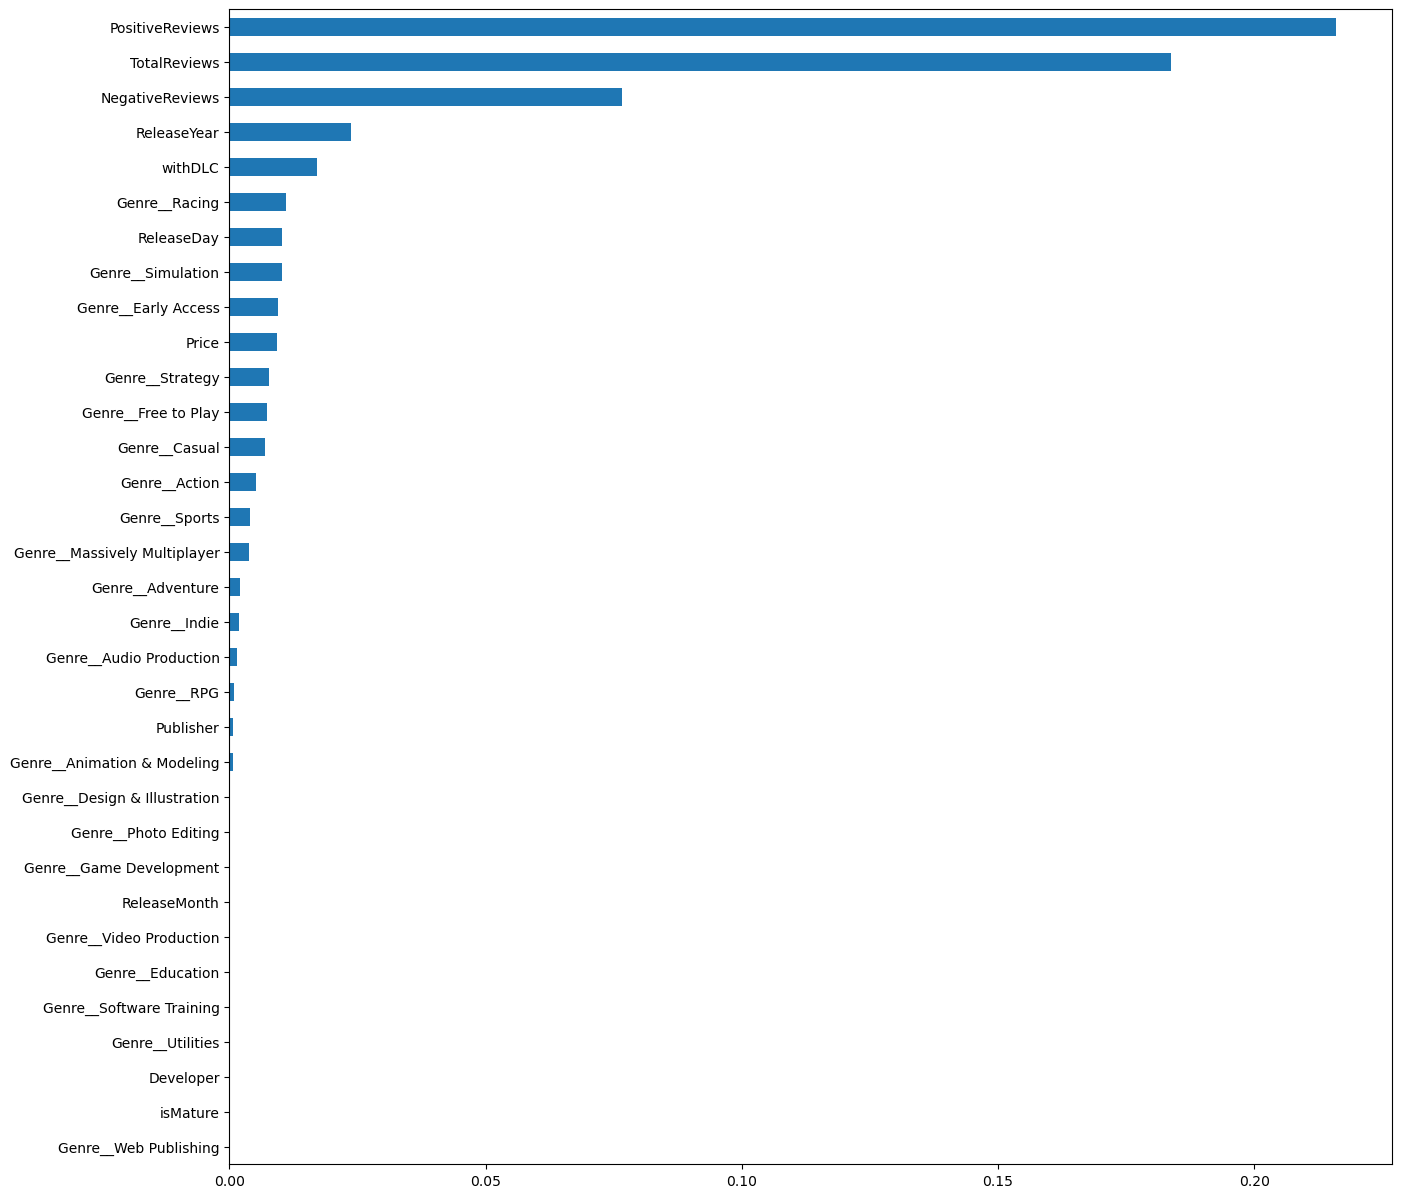

In [5]:
X = cleaned_df.drop(columns = 'Rating')
y = cleaned_df['Rating']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index = X.columns).sort_values(ascending = True)

plt.figure(figsize = (15, 15))
mi_scores.plot.barh()
plt.show()

#### Ta có thể thấy mặc dù cột '**Genre**' có sự ảnh hưởng đến '**Rating**' hay không thì tại vì sau khi one-hot encode nó cùng với các giá trị khác biệt rất cao, mỗi cột 'Genre_*' đại diện cho một giá trị đấy nên đã kéo thấp giá trị mutual information

Ta dùng PCA để giảm chiều các cột **'Genre_'**, sau đó xét lại mối quan hệ

In [6]:
from sklearn.decomposition import PCA

genre_cols = [col for col in X.columns if 'Genre_' in col]
pca = PCA(n_components=1)
X['Genre_pca'] = pca.fit_transform(X[genre_cols])
mi_scores = mutual_info_regression(X[['Genre_pca']], y)
mi_scores

array([0.00734973])